### En este apartado utilizaremos los datos del archivo: "02_data_ready_for_visualization_salaries_mexico_INEGI.csv"
Realizaremos estadísticas descriptivas de cada estado y crearemos visualizaciones para entender y mostrar patrones de crecimiento en cada uno de los estados por sexo. Además, desarrollaremos un modelo predictivo para identificar qué estados de la República Mexicana pueden ofrecer mejores oportunidades de empleo.

### In this section, we will use the data from the file: "02_data_ready_for_visualization_salaries_mexico_INEGI.csv"
We will perform descriptive statistics for each state and create visualizations to understand and display growth patterns in each state by gender. Additionally, we will develop a predictive model to identify which states in Mexico might offer better employment opportunities.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_original = pd.read_csv("csv/02_data_ready_for_visualization_salaries_mexico_INEGI.csv", sep=";", encoding="utf-8")
df_original = df_original.drop(columns="Unnamed: 0")
df_original.head()

,Entidad Federativa,Sexo,Salario,Año,Trimestre
0,Aguascalientes,Hombres,7956.99,2005,Trimestre I
1,Aguascalientes,Mujeres,5738.09,2005,Trimestre I
2,Baja California,Hombres,11121.33,2005,Trimestre I
3,Baja California,Mujeres,8681.55,2005,Trimestre I
4,Baja California Sur,Hombres,10687.53,2005,Trimestre I


In [15]:
df_hombres = df_original.query("Sexo == 'Hombres'").sort_values(by=["Entidad Federativa", "Año"], ascending=True)
df_mujeres = df_original.query("Sexo == 'Mujeres'").sort_values(by=["Entidad Federativa", "Año"], ascending=True)
print(f"DataFrame Hombres:\n {df_hombres.head(5)} \n")
print(f"DataFrame Mujeres:\n {df_mujeres.head(5)}")

DataFrame Hombres:
     Entidad Federativa     Sexo  Salario   Año      Trimestre
0       Aguascalientes  Hombres  7956.99  2005    Trimestre I
64      Aguascalientes  Hombres  8049.33  2005   Trimestre II
128     Aguascalientes  Hombres  8228.39  2005  Trimestre III
192     Aguascalientes  Hombres  8162.13  2005   Trimestre IV
256     Aguascalientes  Hombres  7790.18  2006    Trimestre I 

DataFrame Mujeres:
     Entidad Federativa     Sexo  Salario   Año      Trimestre
1       Aguascalientes  Mujeres  5738.09  2005    Trimestre I
65      Aguascalientes  Mujeres  6014.70  2005   Trimestre II
129     Aguascalientes  Mujeres  6458.98  2005  Trimestre III
193     Aguascalientes  Mujeres  5927.88  2005   Trimestre IV
257     Aguascalientes  Mujeres  6003.17  2006    Trimestre I


### Vamos a crear nuestras visualizaciones

### Let´s create our visualizations

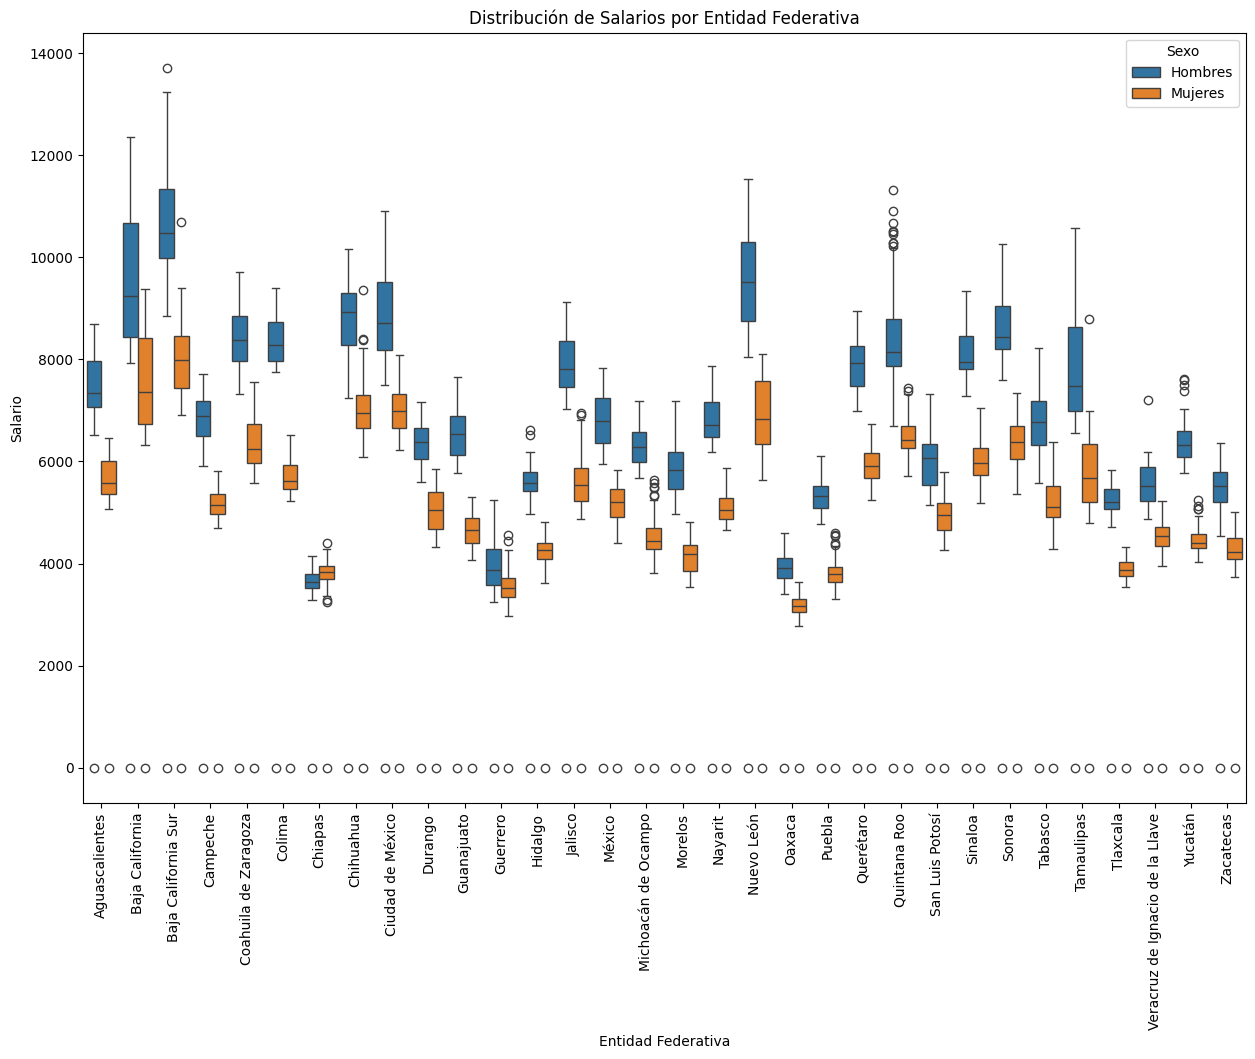

In [33]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_original, x='Entidad Federativa', y='Salario', hue='Sexo')
plt.xticks(rotation=90)
plt.title('Distribución de Salarios por Entidad Federativa')
plt.show()

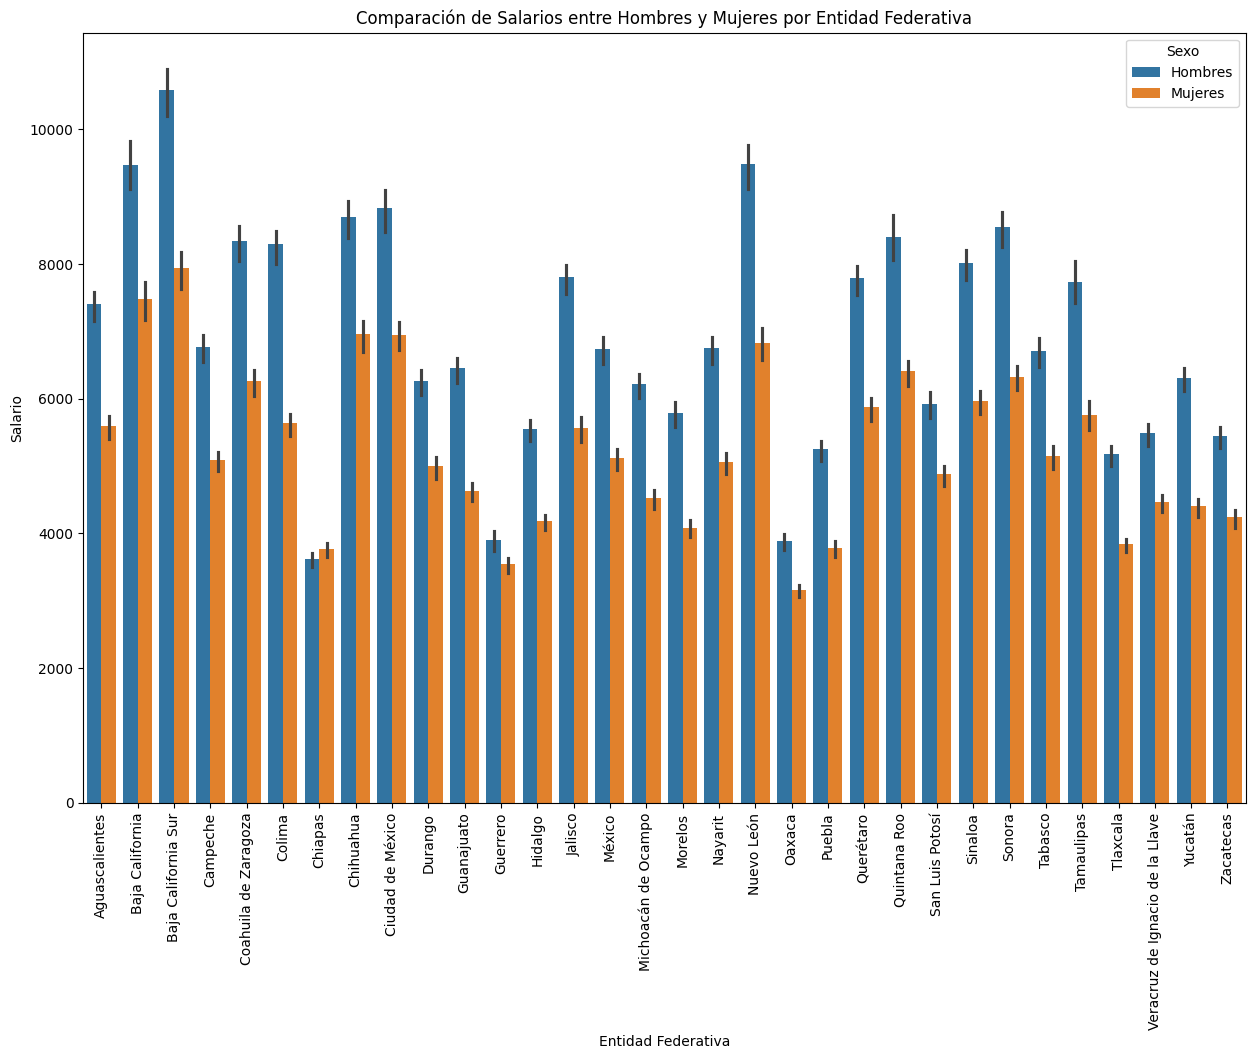

In [32]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df_original, x='Entidad Federativa', y='Salario', hue='Sexo')
plt.xticks(rotation=90)
plt.title('Comparación de Salarios entre Hombres y Mujeres por Entidad Federativa')
plt.show()

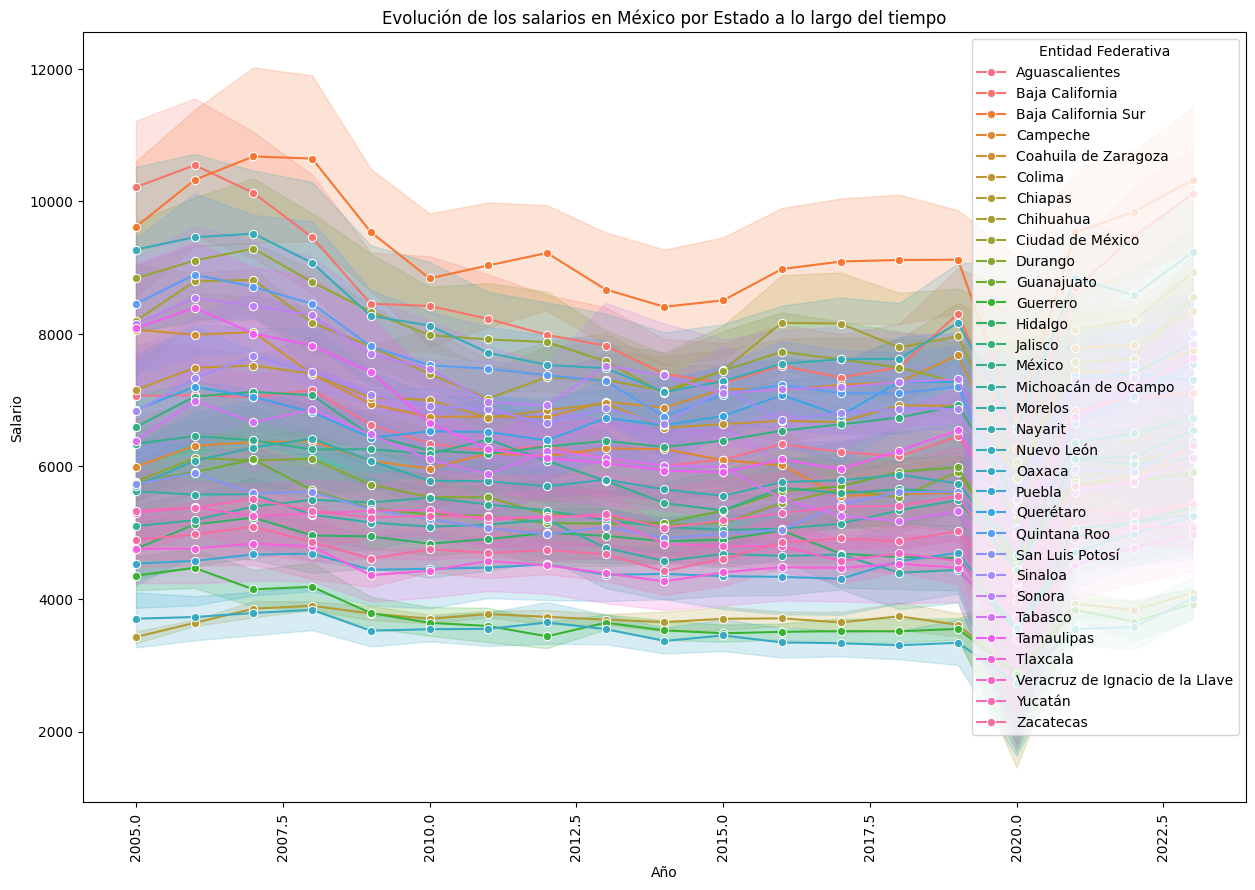

In [39]:
# Evolucion de los salarios en México a lo largo de los años
plt.figure(figsize=(15,10))
sns.lineplot(data=df_original, x='Año', y='Salario', hue='Entidad Federativa', marker = "o")
plt.xticks(rotation=90)
plt.title('Evolución de los salarios en México por Estado a lo largo del tiempo')
plt.show()